In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Sampling

In [2]:
pokemon = Table.read_table('data/pokemon.csv')
pokemon = pokemon.where('generation', 1).select('name', 'type1', 'hp')
pokemon

name,type1,hp
Bulbasaur,grass,45
Ivysaur,grass,60
Venusaur,grass,80
Charmander,fire,39
Charmeleon,fire,58
Charizard,fire,78
Squirtle,water,44
Wartortle,water,59
Blastoise,water,79
Caterpie,bug,45


In [3]:
pokemon.take(make_array(0, 3, 6, 24)) # deterministic sample

name,type1,hp
Bulbasaur,grass,45
Charmander,fire,39
Squirtle,water,44
Pikachu,electric,35


In [4]:
first_10 = pokemon.take(np.arange(10))
first_10

name,type1,hp
Bulbasaur,grass,45
Ivysaur,grass,60
Venusaur,grass,80
Charmander,fire,39
Charmeleon,fire,58
Charizard,fire,78
Squirtle,water,44
Wartortle,water,59
Blastoise,water,79
Caterpie,bug,45


In [12]:
np.random.choice(first_10.column(0), 7) # with replacement

array(['Caterpie', 'Squirtle', 'Squirtle', 'Squirtle', 'Squirtle',
       'Squirtle', 'Charmander'],
      dtype='<U12')

In [13]:
np.random.choice(first_10.column(0), 7, replace=False)

array(['Venusaur', 'Caterpie', 'Charmeleon', 'Charizard', 'Wartortle',
       'Ivysaur', 'Bulbasaur'],
      dtype='<U12')

In [14]:
np.random.choice(first_10.column(0), 11, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [16]:
first_10.sample(7)

name,type1,hp
Charizard,fire,78
Charizard,fire,78
Venusaur,grass,80
Squirtle,water,44
Charmander,fire,39
Squirtle,water,44
Ivysaur,grass,60


In [20]:
first_10.sample(7, with_replacement=False)

name,type1,hp
Squirtle,water,44
Charizard,fire,78
Bulbasaur,grass,45
Blastoise,water,79
Venusaur,grass,80
Charmeleon,fire,58
Wartortle,water,59


# Distributions

In [23]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


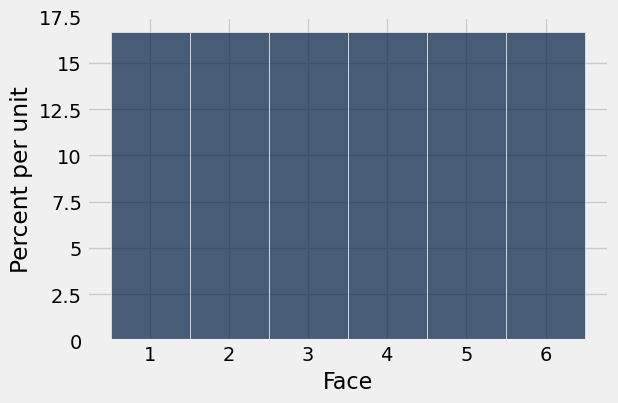

In [26]:
die.hist(bins=np.arange(0.5, 6.6, 1)) # uniform distribution: everybody is 1/6

In [27]:
die.sample(10)

Face
6
1
4
4
3
6
6
4
2
5


# Law of Large Numbers / Law of Averages

In [28]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = np.arange(0.5, 6.6, 1))

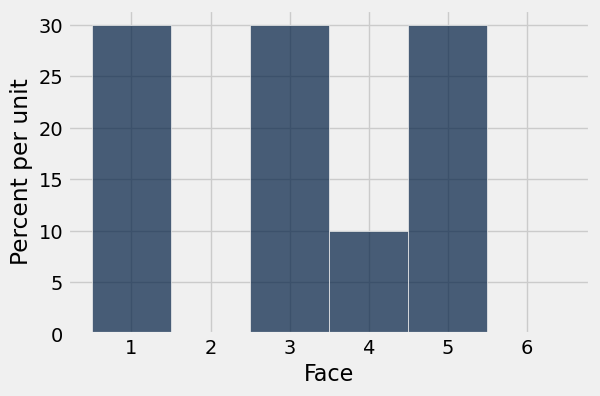

In [30]:
empirical_hist_die(10)

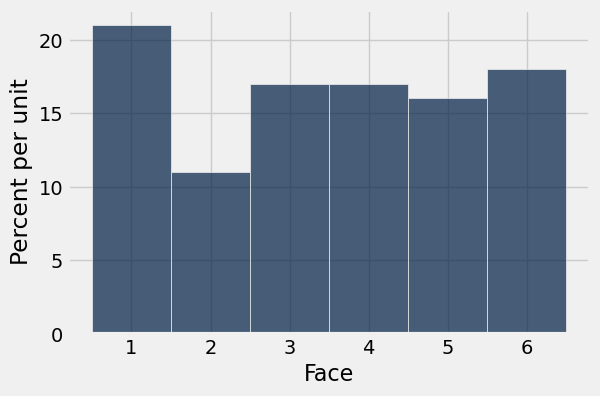

In [31]:
empirical_hist_die(100)

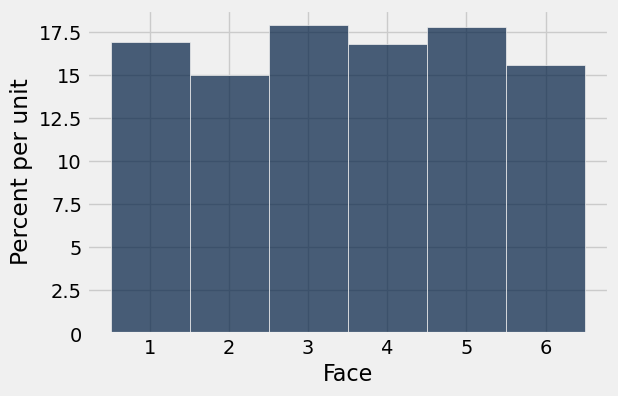

In [32]:
empirical_hist_die(1000)

In [21]:
trips = Table.read_table('data/202506-baywheels-tripdata.csv.zip')
trips

rideable_type,started_at,ended_at,duration,start_station_name,end_station_name,member_casual
classic_bike,2025-06-30 09:07:18.625,2025-06-30 09:16:12.722,534.097,62nd St at Claremont Ave,Telegraph Ave at 49th St,member
electric_bike,2025-06-03 13:07:55.313,2025-06-03 13:16:31.166,515.853,MLK Jr Way at University Ave,Fulton St at Ashby Ave,member
classic_bike,2025-06-23 09:13:34.202,2025-06-23 09:21:50.823,496.621,Precita Park,Harrison St at 20th St,casual
classic_bike,2025-06-16 13:24:02.794,2025-06-16 13:34:30.657,627.863,San Pablo Park,San Pablo Park,member
electric_bike,2025-06-04 06:47:59.506,2025-06-04 07:00:28.534,749.028,Broadway at 40th St,Bay Street Plaza,casual
electric_bike,2025-06-03 17:38:46.966,2025-06-03 17:47:45.805,538.839,Masonic Ave at Turk St,Masonic Ave at Turk St,casual
electric_bike,2025-06-03 21:41:02.433,2025-06-03 21:47:29.827,387.394,Masonic Ave at Turk St,Haight St at Lyon St,casual
electric_bike,2025-06-15 00:26:46.204,2025-06-15 00:41:38.997,892.793,Masonic Ave at Turk St,34th Ave at Balboa St,member
electric_bike,2025-06-03 21:40:42.205,2025-06-03 21:48:15.143,452.938,Masonic Ave at Turk St,Broderick St at Oak St,casual
classic_bike,2025-06-28 16:01:15.655,2025-06-28 16:07:09.931,354.276,23rd St at San Bruno Ave,20th St at Bryant St,member


In [22]:
trips.column('duration').min(), trips.column('duration').max(), trips.column('duration').mean()

(0.084000000000000005, 89680.506999999998, 755.58857930525824)

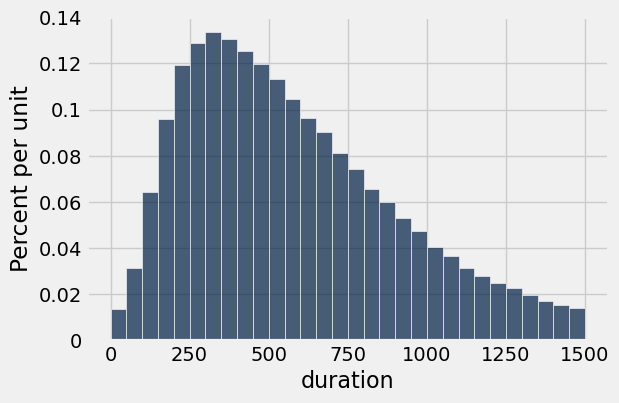

In [23]:
trips.hist('duration', bins=np.arange(0, 1501, 50))

In [24]:
def empirical_hist_duration(n):
    ''' Create an empirical sample and draw a histogram for it '''
    trips.sample(n).hist('duration', bins = np.arange(0, 1501, 50), unit = 'minute')

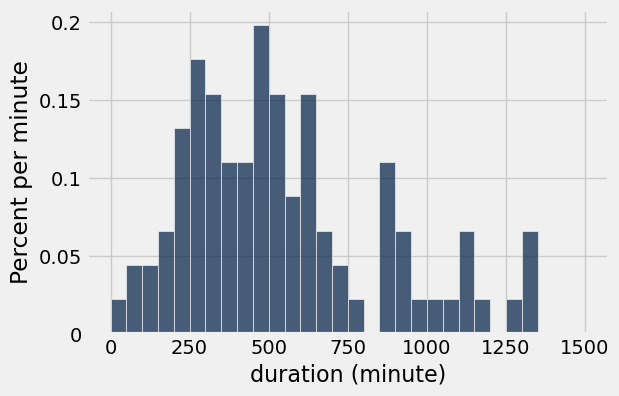

In [25]:
empirical_hist_duration(100)

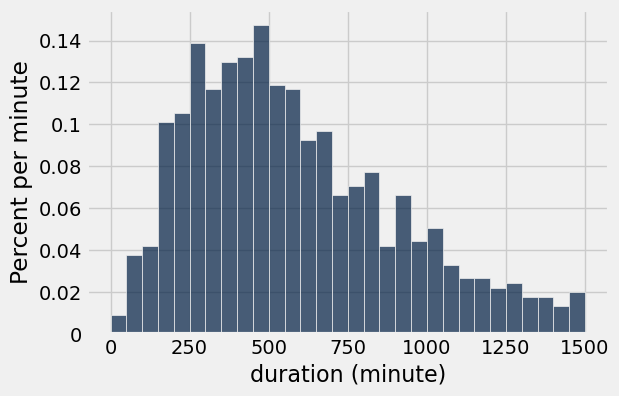

In [26]:
empirical_hist_duration(1000)

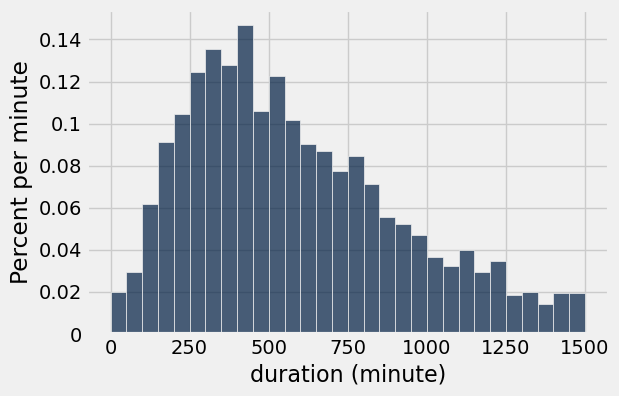

In [27]:
empirical_hist_duration(2500)

# Empirical distribution of a statistic

In [52]:
np.median(trips.column('duration'))

554.89300000000003

In [53]:
np.median(trips.sample(1000).column('duration'))

576.43299999999999

In [54]:
def random_sample_median():
    return np.median(trips.sample(1000).column('duration'))

medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [55]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
540.553
564.012
529.091
571.957
553.295
532.859
558.073
576.185
532.164
559.459


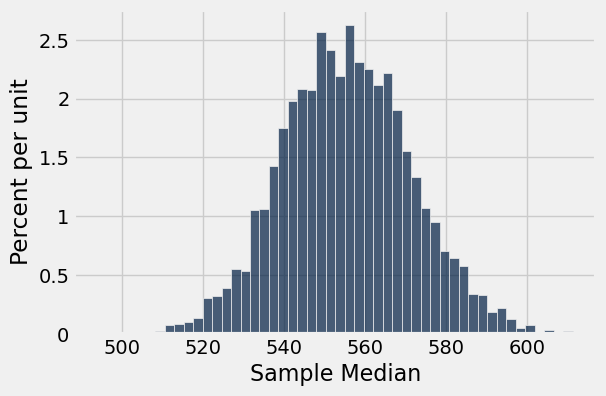

In [58]:
simulated_medians.hist(bins=50)

In [60]:
pokemon.sample(5, with_replacement=False)

name,type1,hp
Nidorino,poison,61
Mankey,fighting,40
Beedrill,bug,65
Tauros,normal,75
Electabuzz,electric,65


# sample_proportions

In [40]:
# the following process is tedious
coin = Table().with_columns('Face', make_array('Heads', 'Tails'))
coin

Face
Heads
Tails


In [41]:
coin.sample(100).group('Face').column('count') / 100

array([ 0.64,  0.36])

In [48]:
distribution = [0.5, 0.5] # make_array(0.5, 0.5) would work here too
sample_proportions(100, distribution)

array([ 0.52,  0.48])